# # HIERARCHIAL CLUSTERING   

#  CRIME DATA SET 

#  Problem statement
  
  
  Different states crime data has given . The objective of this project is to group similar states into clusters  and draw insights about each cluster
  
  
  `CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

OBJECTIVE :- Maximize the understanding of the crime in different states 

CONSTRAINTS  :-  Minimize the crime 
  
  
  **Success Criteria**

- **Business Success Criteria**: Achieve better understanding of the crime patterns 

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: 

**Proposed Plan:**
Grouping the states accornding to the crime will allow to understand the characteristics of each cluster

# DATA COLLECTION
Data: 
   The university details are obtained from the US Higher Education Body and is publicly available for students to access.

Data Dictionary:
- Dataset contains 50 state crime details
- 5 features are recorded for each state

Description 

    1.state names
    2.Murder - numeric Murder arrests 
    3.Assault - numeric Assault arrests 
    4.UrbanPop - numeric Percent urban population
    5.Rape - Rape arrests 

In [1]:
###  Import required libraries  ###

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [3]:
crime = pd.read_csv(r"C:\Users\amare\Downloads\Dataset_Assignment Clustering (1)\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

# EXPLORATORY DATA ANALYSIS

In [6]:
### 1ST MOMENT BUSINESS DECISION

In [7]:
crime.mean()

C:\Users\amare\AppData\Local\Temp\ipykernel_37824\1628597725.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.mean()


Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64

In [8]:
crime.median()

C:\Users\amare\AppData\Local\Temp\ipykernel_37824\621411350.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.median()


Murder        7.25
Assault     159.00
UrbanPop     66.00
Rape         20.10
dtype: float64

In [9]:
### 2nd moment business decision

In [10]:
crime.var()

C:\Users\amare\AppData\Local\Temp\ipykernel_37824\3915067334.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.var()


Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [11]:
crime.std()

C:\Users\amare\AppData\Local\Temp\ipykernel_37824\2172709818.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.std()


Murder       4.355510
Assault     83.337661
UrbanPop    14.474763
Rape         9.366385
dtype: float64

In [12]:
## 3rd moment business decision

In [13]:
crime.skew()

C:\Users\amare\AppData\Local\Temp\ipykernel_37824\4102739717.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.skew()


Murder      0.393956
Assault     0.234410
UrbanPop   -0.226009
Rape        0.801200
dtype: float64

In [14]:
### 4th moment business decision

In [15]:
crime.kurt()

C:\Users\amare\AppData\Local\Temp\ipykernel_37824\1826793320.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  crime.kurt()


Murder     -0.827488
Assault    -1.053848
UrbanPop   -0.738360
Rape        0.353964
dtype: float64

In [16]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# AUTO EDA

In [17]:
import dtale

In [18]:
d = dtale.show(crime)

In [19]:
d.open_browser()

# PREPROCESSING

In [20]:
## TYPECASTING 

In [21]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [22]:
### DUPLICATION

In [23]:
duplicate = crime.duplicated()
print(duplicate)
sum(duplicate)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool


0

In [24]:
### IMPUTATION

In [25]:
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [26]:
### dividing categorical data and numeric data 

In [27]:
crime_cat = crime.iloc[: , 0]
crime_cat.head()

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: Unnamed: 0, dtype: object

In [28]:
crime_num = crime.iloc[: , 1:]
crime_num.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [29]:
### OUTLIER TRAETMENT

Murder         AxesSubplot(0.125,0.11;0.168478x0.77)
Assault     AxesSubplot(0.327174,0.11;0.168478x0.77)
UrbanPop    AxesSubplot(0.529348,0.11;0.168478x0.77)
Rape        AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

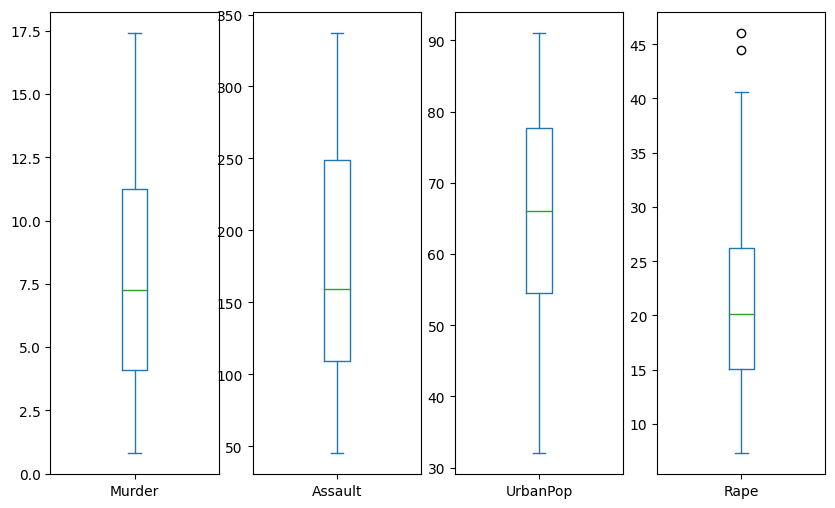

In [30]:
crime_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

In [31]:
### ONLY RAPE VARIABLE HAS OUTLIERS

In [32]:

winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Rape'])

crime_num['Rape'] = winsor.fit_transform(crime_num[['Rape']])

Murder         AxesSubplot(0.125,0.11;0.168478x0.77)
Assault     AxesSubplot(0.327174,0.11;0.168478x0.77)
UrbanPop    AxesSubplot(0.529348,0.11;0.168478x0.77)
Rape        AxesSubplot(0.731522,0.11;0.168478x0.77)
dtype: object

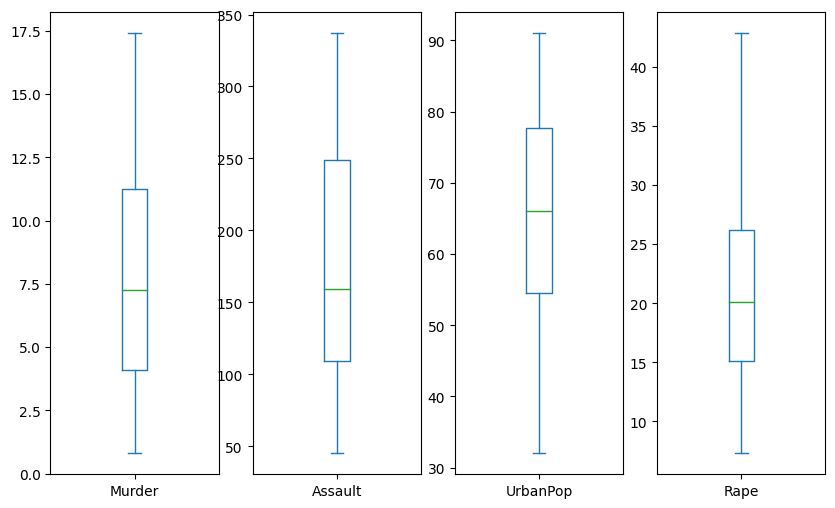

In [33]:
crime_num.plot(kind = 'box', subplots = True, sharey = False, figsize = (10, 6))

In [34]:
#### ZERO VARIANCE FEATURES

In [35]:
crime.var()

C:\Users\amare\AppData\Local\Temp\ipykernel_37824\3915067334.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64

In [36]:
### DUMMY VARIABLE CREATION

In [37]:
crime_cat = pd.get_dummies(crime_cat, columns = ['Unnamed'], drop_first = True)

In [38]:
crime_cat.head()

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
insur_cat.drop(['Customer','State','Effective To Date'], axis = 1)

In [40]:
!pip install PyQt5 pyqtwebengine

In [41]:
%matplotlib inline

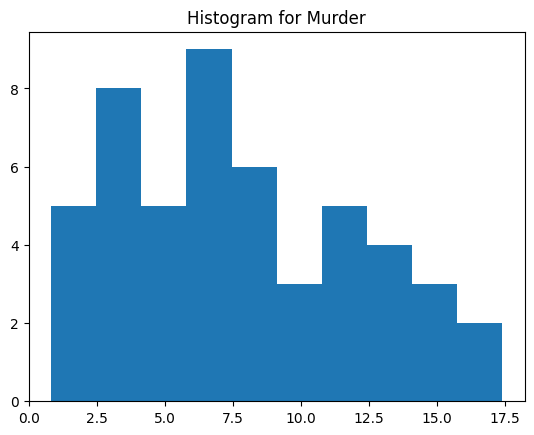

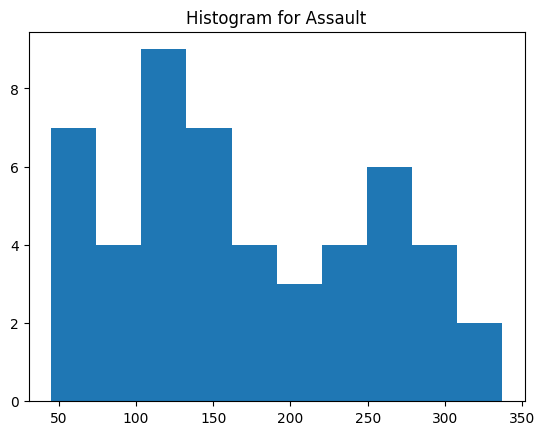

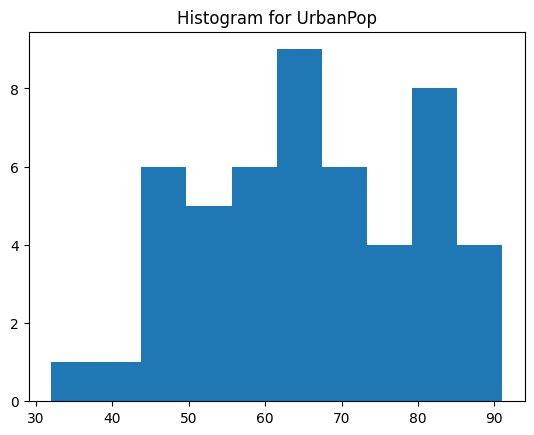

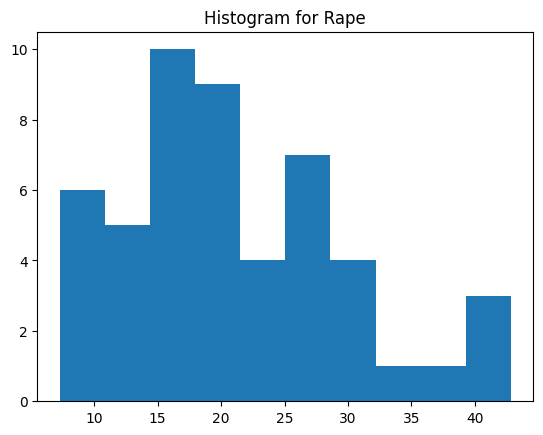

In [42]:

for i in crime_num.columns:
  plt.hist(x = crime_num[i])
  plt.title("Histogram for " + str(i))
  plt.show()

In [43]:
import scipy.stats as stats
import pylab

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 0.8,  2.1,  2.1,  2.2,  2.2,  2.6,  2.6,  2.7,  3.2,  3.3,  3.4,
          3.8,  4. ,  4.3,  4.4,  4.9,  5.3,  5.7,  5.9,  6. ,  6. ,  6.3,
          6.6,  6.8,  7.2,  7.3,  7.4,  7.9,  8.1,  8.5,  8.8,  9. ,  9. ,
          9.7, 10. , 10.4, 11.1, 

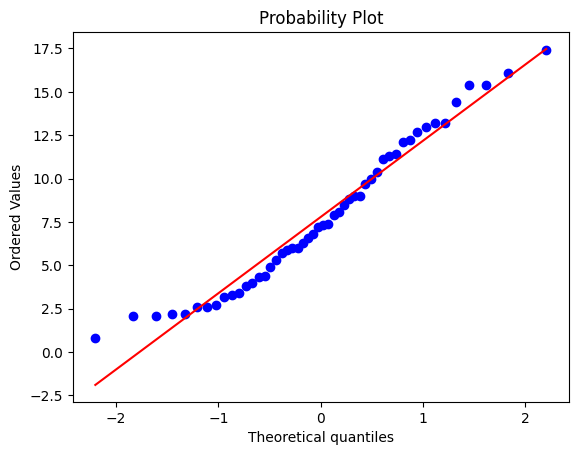

In [44]:
stats.probplot(crime_num.Murder, dist = "norm", plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 45,  46,  48,  53,  56,  57,  72,  81,  83,  86, 102, 106, 109,
         109, 110, 113, 115, 120, 120, 120, 145, 149, 151, 156, 159, 159,
         161, 174, 178, 188, 190, 201, 204, 211, 236, 238, 249, 249, 252,
         254, 255, 259, 263, 276, 27

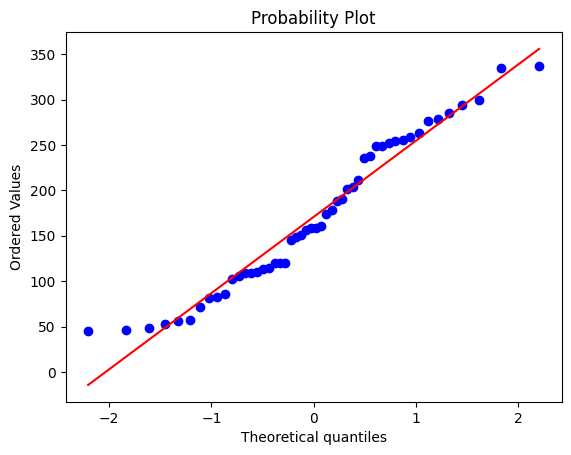

In [45]:
stats.probplot(crime_num.Assault, dist = "norm", plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([32, 39, 44, 44, 45, 45, 48, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59,
         60, 60, 62, 63, 65, 66, 66, 66, 66, 67, 67, 68, 70, 70, 72, 72, 73,
         74, 75, 77, 78, 80, 80, 80, 80, 81, 83, 83, 85, 86, 87, 89, 91],
        dtype=int64)),
 (14.73

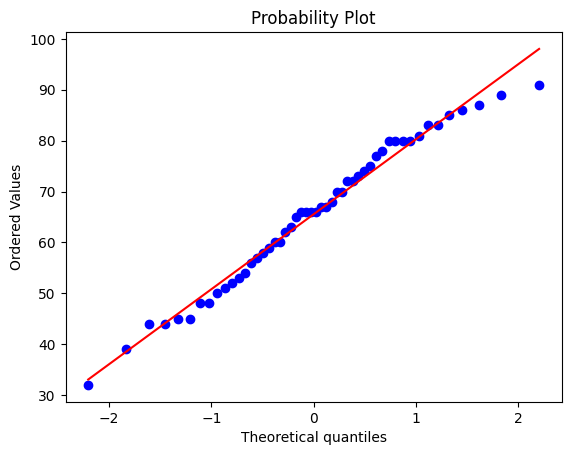

In [46]:
stats.probplot(crime_num.UrbanPop, dist = "norm", plot = pylab)

((array([-2.20385432, -1.83293478, -1.61402323, -1.45296849, -1.32267759,
         -1.21163342, -1.113805  , -1.02561527, -0.94475674, -0.86964726,
         -0.79915021, -0.73241807, -0.66879925, -0.6077796 , -0.54894415,
         -0.49195112, -0.43651377, -0.38238727, -0.32935914, -0.27724191,
         -0.2258675 , -0.17508277, -0.12474591, -0.07472335, -0.02488719,
          0.02488719,  0.07472335,  0.12474591,  0.17508277,  0.2258675 ,
          0.27724191,  0.32935914,  0.38238727,  0.43651377,  0.49195112,
          0.54894415,  0.6077796 ,  0.66879925,  0.73241807,  0.79915021,
          0.86964726,  0.94475674,  1.02561527,  1.113805  ,  1.21163342,
          1.32267759,  1.45296849,  1.61402323,  1.83293478,  2.20385432]),
  array([ 7.3  ,  7.8  ,  8.3  ,  9.3  ,  9.5  , 10.8  , 11.1  , 11.2  ,
         11.3  , 12.8  , 14.2  , 14.9  , 14.9  , 15.6  , 15.8  , 16.1  ,
         16.3  , 16.3  , 16.4  , 16.5  , 17.1  , 18.   , 18.8  , 19.5  ,
         20.   , 20.2  , 20.7  , 21.   

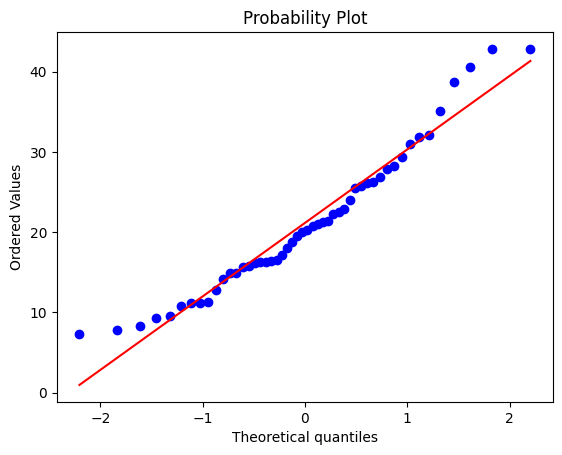

In [47]:
stats.probplot(crime_num.Rape, dist = "norm", plot = pylab)

In [48]:
crime_new = pd.concat([crime_cat , crime_num] , axis = 1)

In [49]:
crime_new.head()

,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Murder,Assault,UrbanPop,Rape
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13.2,236,58,21.200
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10.0,263,48,42.825
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.1,294,80,31.000
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8.8,190,50,19.500
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,9.0,276,91,40.600


In [50]:
crime_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 53 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Alaska          50 non-null     uint8  
 1   Arizona         50 non-null     uint8  
 2   Arkansas        50 non-null     uint8  
 3   California      50 non-null     uint8  
 4   Colorado        50 non-null     uint8  
 5   Connecticut     50 non-null     uint8  
 6   Delaware        50 non-null     uint8  
 7   Florida         50 non-null     uint8  
 8   Georgia         50 non-null     uint8  
 9   Hawaii          50 non-null     uint8  
 10  Idaho           50 non-null     uint8  
 11  Illinois        50 non-null     uint8  
 12  Indiana         50 non-null     uint8  
 13  Iowa            50 non-null     uint8  
 14  Kansas          50 non-null     uint8  
 15  Kentucky        50 non-null     uint8  
 16  Louisiana       50 non-null     uint8  
 17  Maine           50 non-null     uint8

In [51]:
### BIVARIATE ANALYSIS

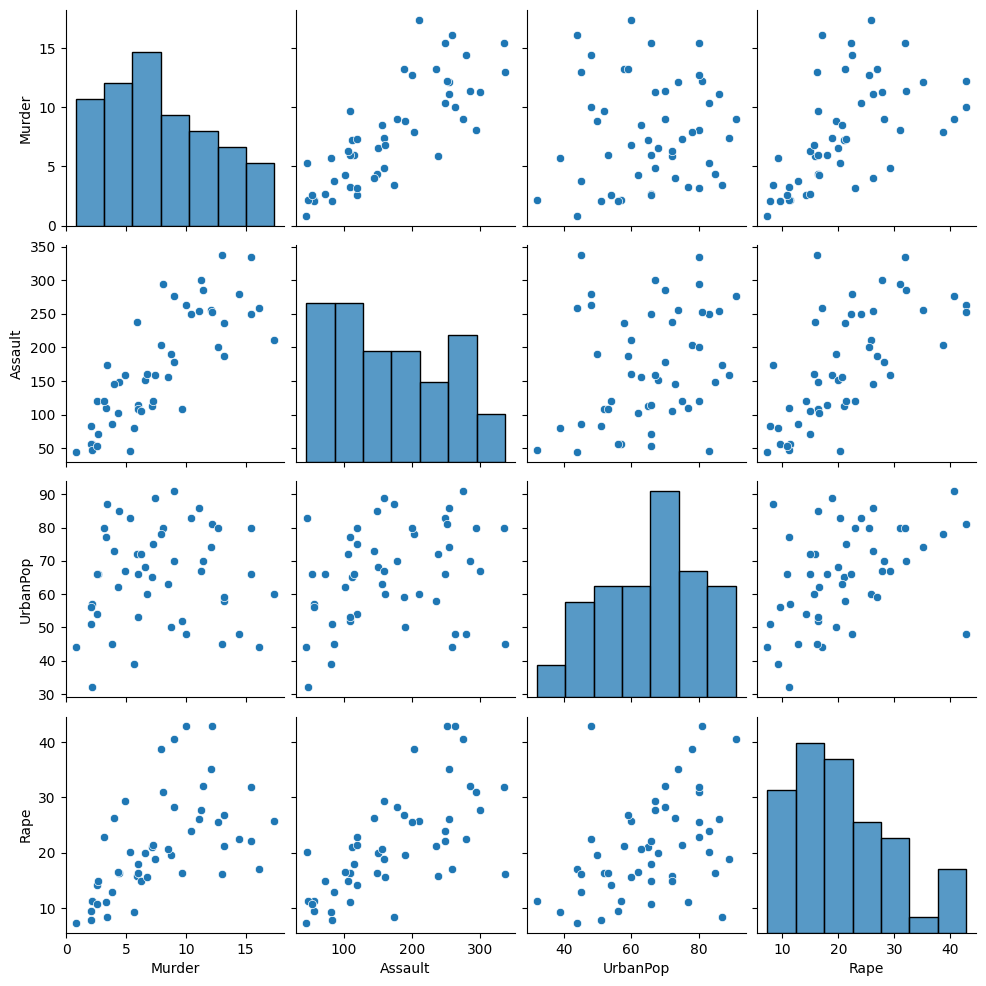

In [52]:
sns.pairplot(crime_num)

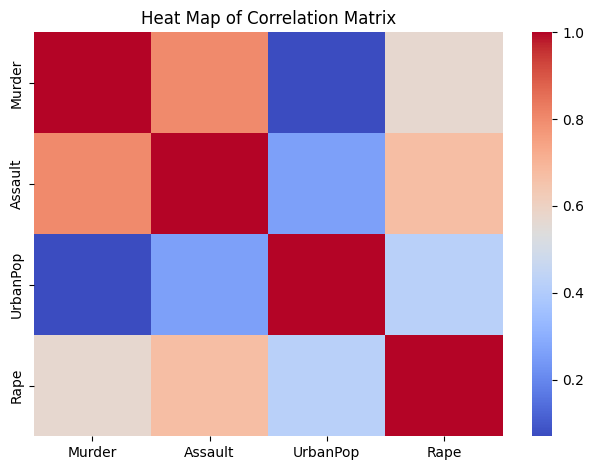

In [53]:
corrmatrix = crime_num.corr(method = "pearson")

sns.heatmap(corrmatrix, xticklabels = corrmatrix.columns, yticklabels = corrmatrix.columns, cmap = "coolwarm")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

In [54]:
### NORMALIZATION

In [5]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [6]:
crime_norm = norm_func(crime_new.iloc[:, 1:])

NameError: name 'crime_new' is not defined

In [7]:
crime_norm.head()

NameError: name 'crime_norm' is not defined

In [58]:
crime_norm.describe()

,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,Hawaii,Idaho,...,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,...,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.420964,0.430685,0.568475,0.389444
std,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,...,0.141421,0.141421,0.141421,0.141421,0.141421,0.141421,0.262380,0.285403,0.245335,0.256732
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.197289,0.219178,0.381356,0.218860
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.388554,0.390411,0.576271,0.360310
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629518,0.698630,0.775424,0.531316
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# CLUSTER MODEL BUILDING

# HIERARCHIAL CLUSTERING

In [59]:
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

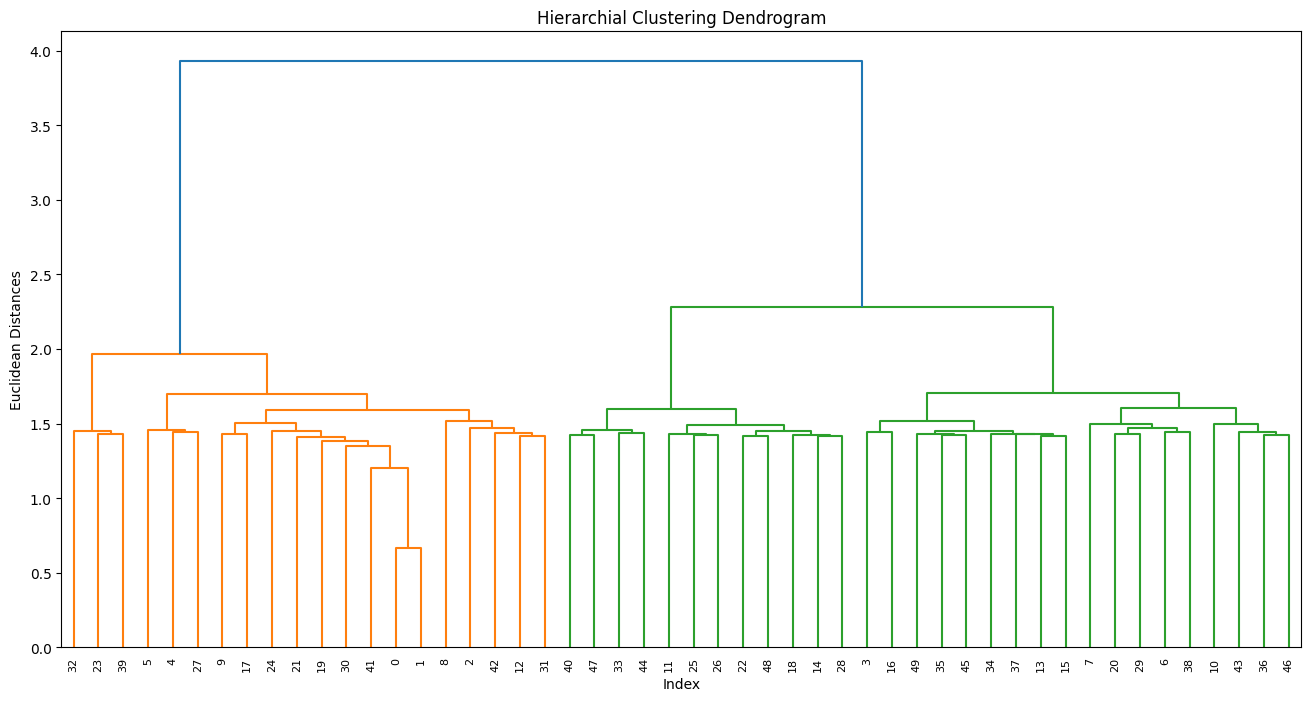

In [60]:
plt.figure(1 , figsize =(16,8))
tree_plot = dendrogram(linkage(crime_norm, method = "ward"))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')
plt.show()

In [61]:
### APPLYING AGGLOMERATIVE CLUSTERING CHOSING 3 CLUSTERS

In [62]:
hc1 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')

crime_hc_average = hc1.fit_predict(crime_norm)
crime_hc_average

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [63]:
hc2 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')

crime_hc_complete = hc2.fit_predict(crime_norm)
crime_hc_complete

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [64]:
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')

crime_hc_single= hc3.fit_predict(crime_norm)
crime_hc_single

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
### LOOKING AT THE RESULTS COMPLETE AND AVERAGE HAS ALMOST SAME CLUSTERS 

In [66]:
hc2.labels_   ## REFERING TO COMPLETE LINKAGAE

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [67]:
cluster_labels = pd.Series(hc2.labels_)

In [68]:
crime['cluster'] = cluster_labels

In [69]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1


In [70]:
#### CLUSTER EVALUATION

In [71]:
crime2 = crime.sort_values(by = 'cluster' , ascending = True)
crime2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
24,Missouri,9.0,178,70,28.2,0
48,Wisconsin,2.6,53,66,10.8,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0
33,North Dakota,0.8,45,44,7.3,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [72]:
crime2.iloc[: , 1:5].groupby(crime2.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,11.138462,261.846154,75.076923,32.653846
2,14.916667,253.833333,53.666667,21.766667


In [73]:
cluster0 = crime2.loc[(crime2.cluster == 0), :]
cluster0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
24,Missouri,9.0,178,70,28.2,0
48,Wisconsin,2.6,53,66,10.8,0
25,Montana,6.0,109,53,16.4,0
26,Nebraska,4.3,102,62,16.5,0
28,New Hampshire,2.1,57,56,9.5,0
29,New Jersey,7.4,159,89,18.8,0
33,North Dakota,0.8,45,44,7.3,0
34,Ohio,7.3,120,75,21.4,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0


In [74]:
cluster1 = crime2.loc[(crime2.cluster == 1), :]
cluster1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
42,Texas,12.7,201,80,25.5,1
8,Florida,15.4,335,80,31.9,1
21,Michigan,12.1,255,74,35.1,1
19,Maryland,11.3,300,67,27.8,1
12,Illinois,10.4,249,83,24.0,1
31,New York,11.1,254,86,26.1,1


In [75]:
cluster2 = crime2.loc[(crime2.cluster == 2), :]
cluster2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
39,South Carolina,14.4,279,48,22.5,2
41,Tennessee,13.2,188,59,26.9,2
32,North Carolina,13.0,337,45,16.1,2
17,Louisiana,15.4,249,66,22.2,2
23,Mississippi,16.1,259,44,17.1,2
9,Georgia,17.4,211,60,25.8,2


In [76]:
cluster0.to_csv('crime_0.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\amare'

In [77]:
cluster1.to_csv('crime_1.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\amare'

In [78]:
cluster2.to_csv('crime_2.csv', encoding = 'utf-8')
import os
os.getcwd()

'C:\\Users\\amare'

In [79]:
## CLUSTER EVALUATION

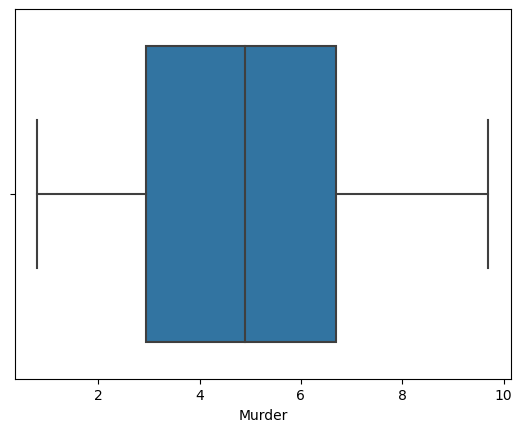

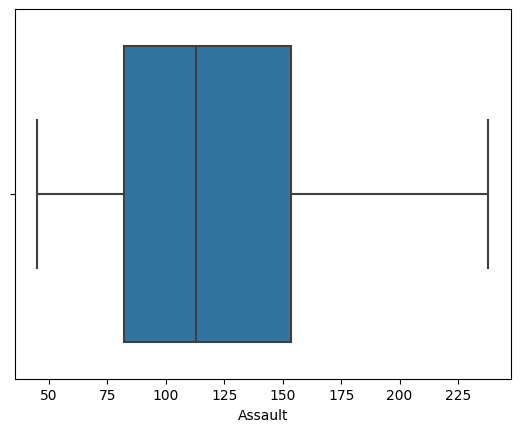

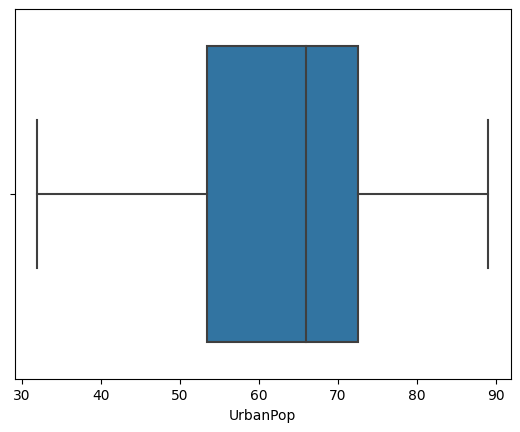

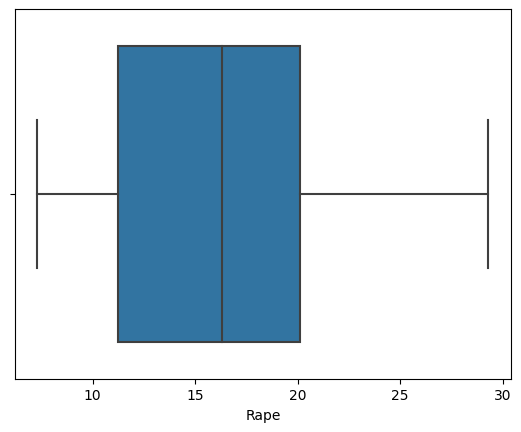

In [80]:
for i in cluster0.columns[1:5]:
  sns.boxplot(x = cluster0[i])
  plt.show()

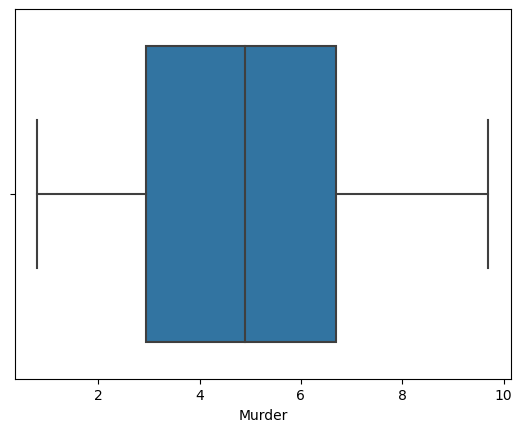

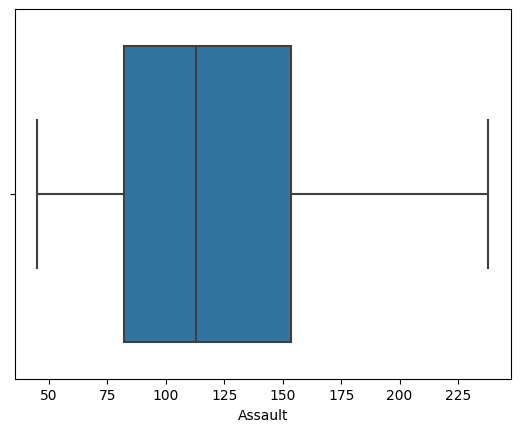

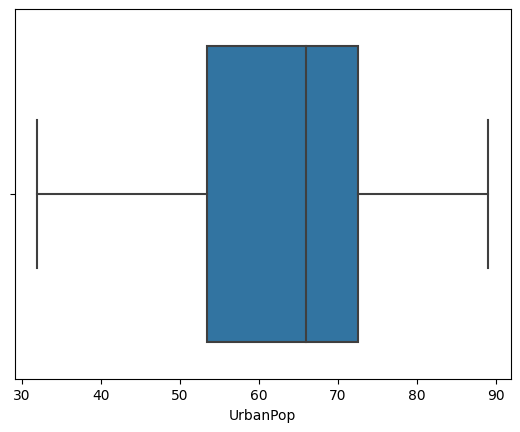

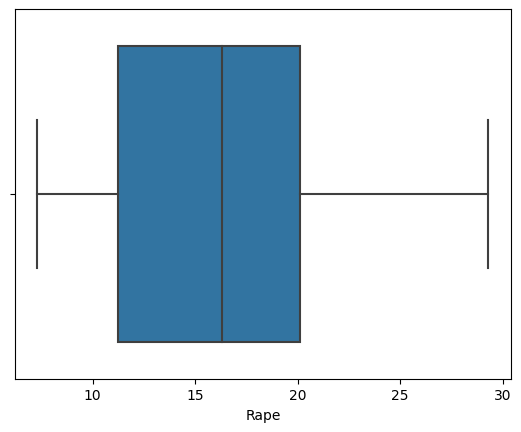

In [81]:
for i in cluster1.columns[1:5]:
  sns.boxplot(x = cluster0[i])
  plt.show()

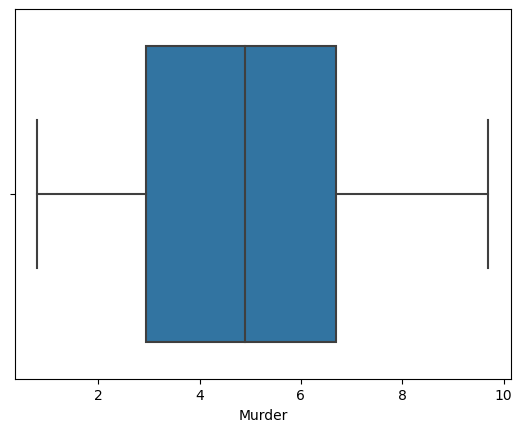

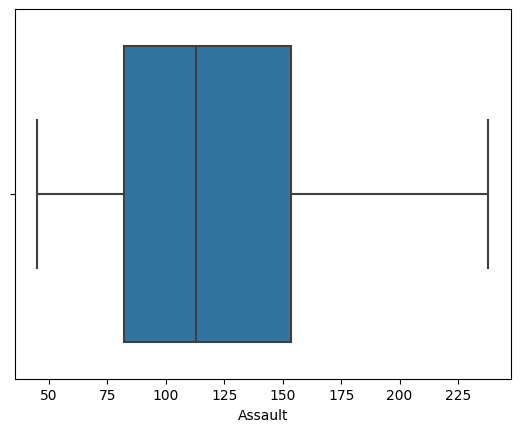

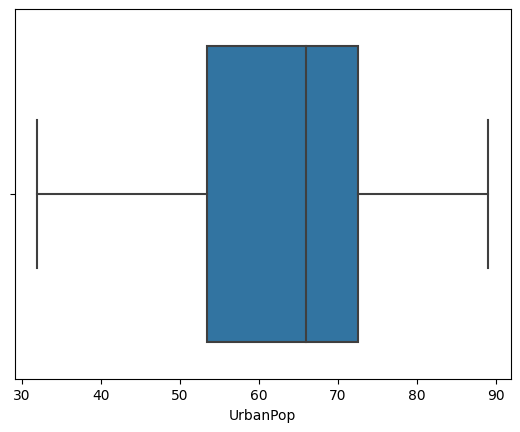

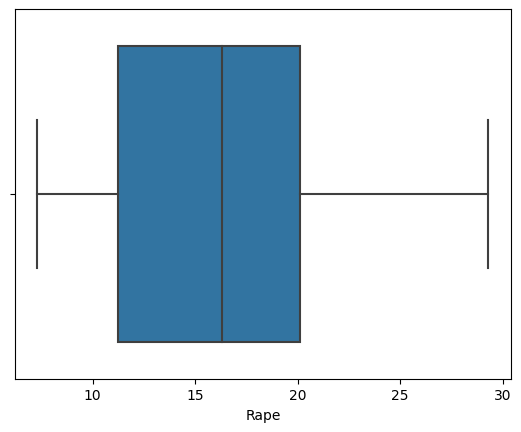

In [82]:
for i in cluster2.columns[1:5]:
  sns.boxplot(x = cluster0[i])
  plt.show()

In [83]:
from sklearn import metrics

In [87]:
metrics.silhouette_score(crime_num ,cluster_labels)

0.3503715473773099

    1 . Cluster0 = the group of states that are low on crime rate 
    2. Cluster1 = the group of states that have comparatively high crime rate and would require action as well
    3.Cluster2 =  the group of states that are high on crime in either if the categories described and need immediate action on                    high alert